# Lesson 2 - Practice Hands-On


# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Import Data

In [2]:
Mpg = sns.load_dataset('mpg')
Mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Question Setup 

### Determine how cars are grouped together by using the mpg dataset built into Seaborn.

# Data Wrangling

## Dropping non-numeric columns 

In [3]:
mpgTrimmed = Mpg.drop(['origin', 'name'], axis = 1)
mpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


## Dropping Missing Values (NAs) 

In [4]:
mpgTrimmed.dropna(inplace=True)

## Converting Floats to Integers 

In [5]:
mpgTrimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


In [6]:
mpgTrimmed.mpg = mpgTrimmed.mpg.astype(int)
mpgTrimmed.displacement = mpgTrimmed.displacement.astype(int)
mpgTrimmed.horsepower = mpgTrimmed.horsepower.astype(int)
mpgTrimmed.acceleration = mpgTrimmed.acceleration.astype(int)

In [7]:
mpgTrimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mpg           392 non-null    int32
 1   cylinders     392 non-null    int64
 2   displacement  392 non-null    int32
 3   horsepower    392 non-null    int32
 4   weight        392 non-null    int64
 5   acceleration  392 non-null    int32
 6   model_year    392 non-null    int64
dtypes: int32(4), int64(3)
memory usage: 18.4 KB


In [8]:
mpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18,8,307,130,3504,12,70
1,15,8,350,165,3693,11,70
2,18,8,318,150,3436,11,70
3,16,8,304,150,3433,12,70
4,17,8,302,140,3449,10,70


# Performing k-Means

## Testing 2 clusters 

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(mpgTrimmed)

KMeans(n_clusters=2)

### Adding Labels to the Dataframe 

In [10]:
mpgTrimmed['group'] = kmeans.labels_
mpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,group
0,18,8,307,130,3504,12,70,1
1,15,8,350,165,3693,11,70,1
2,18,8,318,150,3436,11,70,1
3,16,8,304,150,3433,12,70,1
4,17,8,302,140,3449,10,70,1


## Plotting the k-Means

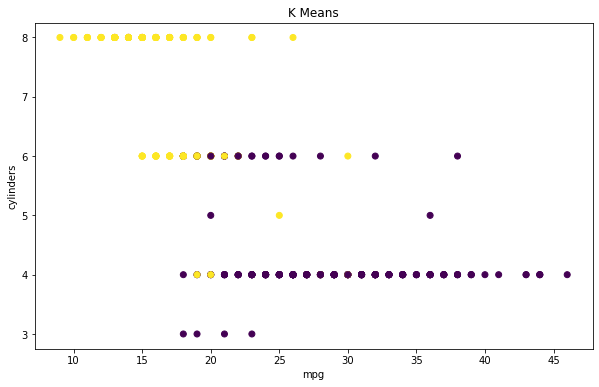

In [11]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('cylinders')
plt.scatter(mpgTrimmed['mpg'], mpgTrimmed['cylinders'], c=kmeans.labels_, cmap='viridis')

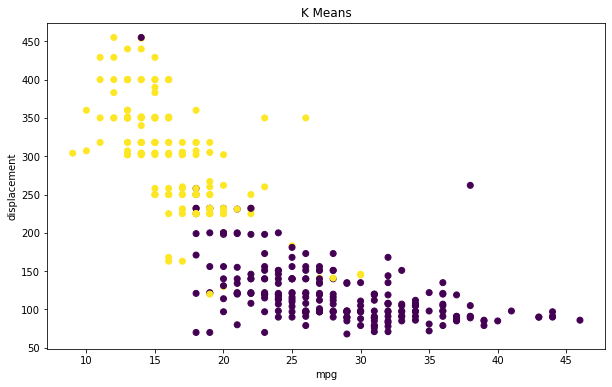

In [12]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.scatter(mpgTrimmed['mpg'], mpgTrimmed['displacement'], c=kmeans.labels_, cmap='viridis')

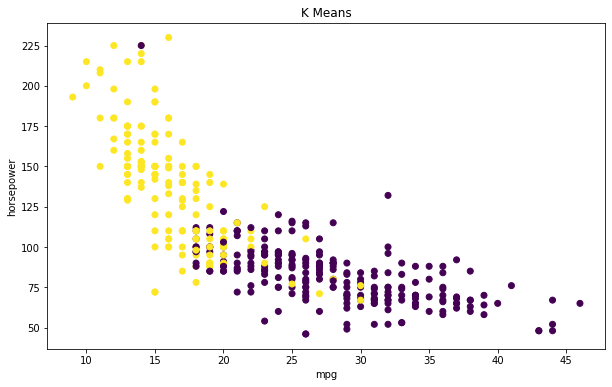

In [13]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.scatter(mpgTrimmed['mpg'], mpgTrimmed['horsepower'], c=kmeans.labels_, cmap='viridis')

In [14]:
mpgTrimmed.groupby('group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
group,,,,,,,
0,27.889831,4.305085,123.521186,82.593220,2381.381356,15.813559,76.783898
1,16.314103,7.237179,301.653846,137.564103,3879.532051,14.237179,74.762821


The first cluster includes cars that have a higher mpg, are slightly older, and have a lower
* no. of cylinders
* displacement
* horsepower
* weight
* accelaration.

## Testing 3 Clusters

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(mpgTrimmed)

KMeans(n_clusters=3)

In [16]:
mpgTrimmed['group'] = kmeans.labels_
mpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,group
0,18,8,307,130,3504,12,70,1
1,15,8,350,165,3693,11,70,0
2,18,8,318,150,3436,11,70,1
3,16,8,304,150,3433,12,70,1
4,17,8,302,140,3449,10,70,1


## Plotting the k-Means with 3 clusters 

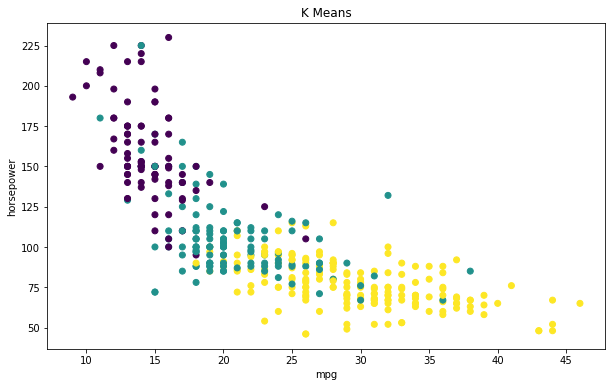

In [17]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.scatter(mpgTrimmed['mpg'], mpgTrimmed['horsepower'], c=kmeans.labels_, cmap='viridis')

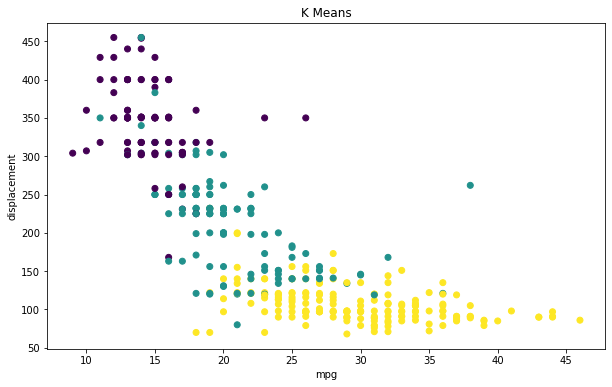

In [18]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.scatter(mpgTrimmed['mpg'], mpgTrimmed['displacement'], c=kmeans.labels_, cmap='viridis')

In [19]:
mpgTrimmed.groupby('group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
group,,,,,,,
0,14.533333,7.866667,344.144444,157.811111,4236.322222,13.200000,74.011111
1,20.590164,5.819672,212.614754,105.401639,3162.581967,15.516393,76.352459
2,29.483333,4.038889,107.205556,77.166667,2222.827778,15.955556,76.711111


* The group of cars with a lower mpg (1) has more cylinders (8), higher displacement, higher horsepower, higher weight, faster acceleration and are slightly older 
* The group of cars with the highest mpg (2) has the least amount of cylinders (4), the lowest displacement, horsepower and weight, and the slowest acceleration and are slightly newer
* The mid range group (0) has on average 6 cylinders, midrange displacement, horsepower and weight, but the acceleration isn't that much higher than group 2, although they are about the same age

## Testing 4 clusters 

In [20]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(mpgTrimmed)

KMeans(n_clusters=4)

In [21]:
mpgTrimmed['group'] = kmeans.labels_
mpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,group
0,18,8,307,130,3504,12,70,2
1,15,8,350,165,3693,11,70,2
2,18,8,318,150,3436,11,70,2
3,16,8,304,150,3433,12,70,2
4,17,8,302,140,3449,10,70,2


In [22]:
mpgTrimmed.groupby('group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
group,,,,,,,
0,24.418367,4.704082,154.346939,94.295918,2746.438776,15.326531,77.112245
1,13.898551,8.000000,356.536232,165.130435,4366.594203,12.782609,73.608696
2,18.179775,6.640449,259.966292,116.808989,3484.483146,15.337079,75.584270
3,30.566176,3.977941,98.125000,72.948529,2107.705882,16.205882,76.625000


## Plotting the k-Means with 4 clusters 

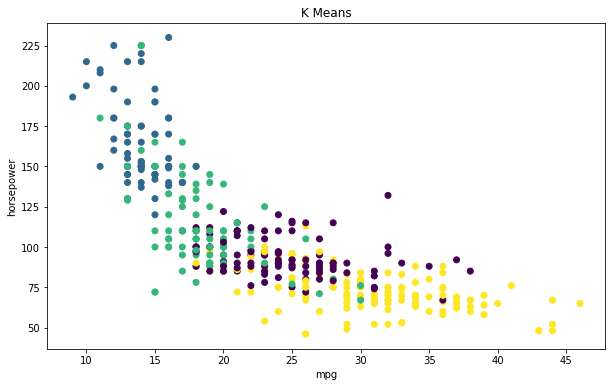

In [23]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.scatter(mpgTrimmed['mpg'], mpgTrimmed['horsepower'], c=kmeans.labels_, cmap='viridis')

* The group with the lowest mpg (1), has 8 cylinders on average, the highest displacement, horsepower, and weight, fastest acceleration and are also the oldest cars
* The group with the highest mpg (2), has 4 cylinders on average, the lowest displacement, and weight, and the slowest acceleration
* The other 2 groups (0, 3) have approximately the same acceleration and middle of the range mpg, horsepower and weight. There is little differentiation between these two groups
* We can see that in graph that the 4 groups blend together more than with the 3 clusters
* It seems that the 3 cluster option is optimal

# KNN analysis 

##  Using KNN to try to predict the mpg, using the numeric variables in the Mpg dataset

In [24]:
mpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,group
0,18,8,307,130,3504,12,70,2
1,15,8,350,165,3693,11,70,2
2,18,8,318,150,3436,11,70,2
3,16,8,304,150,3433,12,70,2
4,17,8,302,140,3449,10,70,2


In [25]:
scaler = StandardScaler()
scaler.fit(mpgTrimmed.drop('group', axis=1))
scaledVariables = scaler.transform(mpgTrimmed.drop('group', axis=1))
mpgScaled = pd.DataFrame(scaledVariables, columns=mpgTrimmed.columns[:-1])
mpgScaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.682931,1.483947,1.077290,0.664133,0.620540,-1.162771,-1.625315
1,-1.070728,1.483947,1.488727,1.574594,0.843334,-1.527708,-1.625315
2,-0.682931,1.483947,1.182541,1.184397,0.540382,-1.527708,-1.625315
3,-0.941463,1.483947,1.048585,1.184397,0.536845,-1.162771,-1.625315
4,-0.812197,1.483947,1.029448,0.924265,0.555706,-1.892646,-1.625315


In [26]:
mpgScaled1 = mpgScaled.drop('mpg', axis = 1)
mpgScaled1.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.483947,1.077290,0.664133,0.620540,-1.162771,-1.625315
1,1.483947,1.488727,1.574594,0.843334,-1.527708,-1.625315
2,1.483947,1.182541,1.184397,0.540382,-1.527708,-1.625315
3,1.483947,1.048585,1.184397,0.536845,-1.162771,-1.625315
4,1.483947,1.029448,0.924265,0.555706,-1.892646,-1.625315


In [27]:
x = mpgScaled1
y = mpgTrimmed['mpg']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## Choosing the best model - Elbow Method

In [29]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

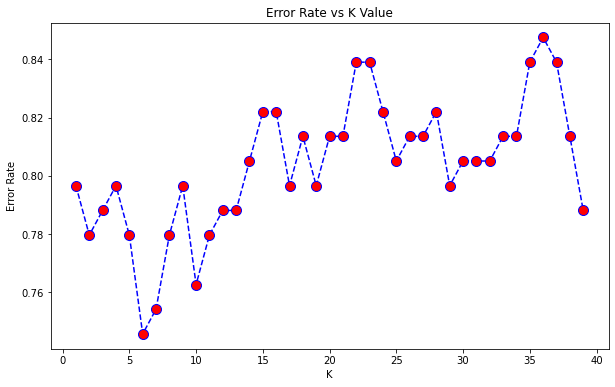

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Running the final model with k = 6 

In [31]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [32]:
print(confusion_matrix(y_test, pred))

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 5 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 4 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          12       0.40      1.00      0.57         2
          13       0.50      0.50      0.50         8
          14       0.44      0.57      0.50         7
          15       0.25      0.25      0.25         8
          16       0.00      0.00      0.00         3
          17       0.17      0.20      0.18         5
          18       0.56      0.56      0.56         9
          19       0.17      0.14      0.15         7
          20       0.31      0.50      0.38         8
          21       0.00      0.00      0.00         4
          22       0.00      0.00      0.00         3
          23       0.50      0.14      0.22         7
          24       0.00      0.00      0.00         7
          25       0.17      0.17      0.17         6
          26       0.33      0.60      0.43         5
          27       0.33      0.20      0.25         5
          28       0.00      0.00      0.00         2
          29       0.33    

C:\Users\TURBULENCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TURBULENCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TURBULENCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### This model does not predict well the mpg from the numeric data we have (24% overall accuracy), probably because there isn't sufficient data for many of the mpg values, as we can see in the value_counts(). <br> It would be more effective to group the mpg into mutually exclusive categories and run the kNN analysis on those categories. 
### The k-means algorithm showed that the data was grouped in 3 clusters:
* One group with 14.5 average mpg
* One group with 20.6 average mpg
* One group with 29.5 average mpg
### We can use the "group" variable as a recoded mpg to run the kNN algorithm.

In [34]:
mpgTrimmed.mpg.value_counts()

18    24
15    21
20    20
14    20
13    20
19    20
26    19
16    18
25    16
23    15
27    15
17    15
24    15
32    14
22    13
31    13
29    13
28    13
21    12
30    11
36     9
34     9
33     8
37     6
12     6
38     5
11     4
35     4
39     3
44     3
10     2
43     2
9      1
41     1
46     1
40     1
Name: mpg, dtype: int64

## Resetting kmeans to the 3-cluster model 

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(mpgTrimmed)
mpgTrimmed['group'] = kmeans.labels_
mpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,group
0,18,8,307,130,3504,12,70,2
1,15,8,350,165,3693,11,70,1
2,18,8,318,150,3436,11,70,2
3,16,8,304,150,3433,12,70,2
4,17,8,302,140,3449,10,70,2


In [36]:
mpgTrimmed.group.value_counts()

0    180
2    122
1     90
Name: group, dtype: int64

In [37]:
mpgTrimmed.groupby('group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
group,,,,,,,
0,29.483333,4.038889,107.205556,77.166667,2222.827778,15.955556,76.711111
1,14.533333,7.866667,344.144444,157.811111,4236.322222,13.200000,74.011111
2,20.590164,5.819672,212.614754,105.401639,3162.581967,15.516393,76.352459


## Running the kNN with group variable

In [38]:
x = mpgScaled1
y = mpgTrimmed['group']

In [39]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.3, random_state=101)

In [40]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1, y_train1)
    predI = knn.predict(x_test1)
    errorRate.append(np.mean(predI != y_test1))

Text(0, 0.5, 'Error Rate')

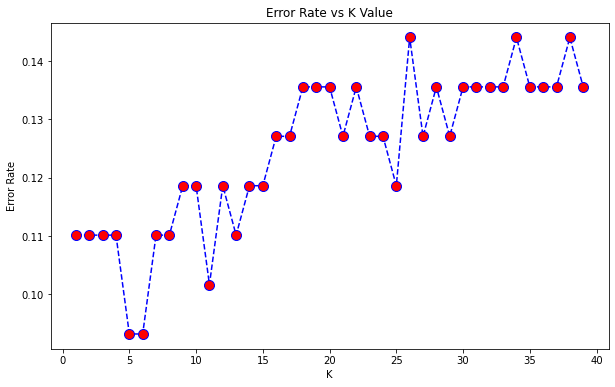

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Running the final model with k = 5

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train1, y_train1)
pred = knn.predict(x_test1)

In [43]:
print(confusion_matrix(y_test1, pred))

[[45  0  3]
 [ 0 29  2]
 [ 3  3 33]]


In [44]:
print(classification_report(y_test1,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        48
           1       0.91      0.94      0.92        31
           2       0.87      0.85      0.86        39

    accuracy                           0.91       118
   macro avg       0.90      0.91      0.91       118
weighted avg       0.91      0.91      0.91       118



In [45]:
mpgTrimmed.groupby('group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
group,,,,,,,
0,29.483333,4.038889,107.205556,77.166667,2222.827778,15.955556,76.711111
1,14.533333,7.866667,344.144444,157.811111,4236.322222,13.200000,74.011111
2,20.590164,5.819672,212.614754,105.401639,3162.581967,15.516393,76.352459


### The overall precision of the model is 91%
### The model was accurate in predicting:
* The group with 20.6 average mpg 87% of the time
* The group with 14.5 average mpg 91% of the time
* The group with 29.5 average mpg 94% of the time

# Second kNN analysis
##  We can also use kNN to try to predict the country of origin, using the numeric variables in the Mpg dataset

In [46]:
Mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [47]:
Mpg1 = Mpg.dropna()

## Scaling the data

In [48]:
mpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,group
0,18,8,307,130,3504,12,70,2
1,15,8,350,165,3693,11,70,1
2,18,8,318,150,3436,11,70,2
3,16,8,304,150,3433,12,70,2
4,17,8,302,140,3449,10,70,2


In [49]:
scaler = StandardScaler()
scaler.fit(mpgTrimmed.drop('group', axis=1))
scaledVariables = scaler.transform(mpgTrimmed.drop('group', axis=1))
mpgScaled = pd.DataFrame(scaledVariables, columns=mpgTrimmed.columns[:-1])
mpgScaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.682931,1.483947,1.077290,0.664133,0.620540,-1.162771,-1.625315
1,-1.070728,1.483947,1.488727,1.574594,0.843334,-1.527708,-1.625315
2,-0.682931,1.483947,1.182541,1.184397,0.540382,-1.527708,-1.625315
3,-0.941463,1.483947,1.048585,1.184397,0.536845,-1.162771,-1.625315
4,-0.812197,1.483947,1.029448,0.924265,0.555706,-1.892646,-1.625315


In [50]:
x = mpgScaled
y = Mpg1['origin']

## Test/Train split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## Choosing the best model - Elbow Method

In [52]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

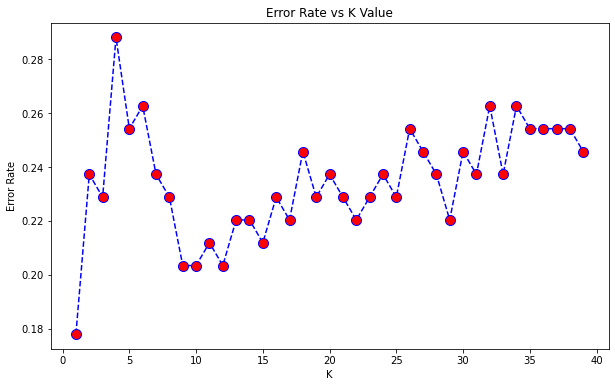

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### The lowest error is for  k = 1

## Running the kNN model 

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [55]:
print(confusion_matrix(y_test, pred))

[[12  2  1]
 [ 3 12  6]
 [ 4  5 73]]


In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      europe       0.63      0.80      0.71        15
       japan       0.63      0.57      0.60        21
         usa       0.91      0.89      0.90        82

    accuracy                           0.82       118
   macro avg       0.73      0.75      0.74       118
weighted avg       0.83      0.82      0.82       118



### The overall precision of this model is 83%
### The model was accurate in predicting:
* Cars from Europe 63% of the time
* Cars from Japan 63% of the time
* Cars from the USA 91% of the time